In [66]:
import sys
!{sys.executable} -m pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: C:\Users\vikau\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
!pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\vikau\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# ================================
# 1. IMPORT LIBRARY & LOAD DATASET
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

import pickle

# Load dataset
path = r"D:\Tugas_Proyek_Akhir_Rani_Ummi\heart.csv"
df = pd.read_csv(path)

print("Dataset Loaded:", df.shape)
print(df.head())


Dataset Loaded: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [70]:
# =============================
# 2. PREPROCESSING DATA (FIXED)
# =============================

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Kolom sesuai dataset Heart Disease
cols_expected = [
    'age','sex','cp','trestbps','chol','fbs','restecg',
    'thalach','exang','oldpeak','slope','ca','thal','target'
]

# Filter kolom
df = df[cols_expected].copy()

# Isi missing value dengan median
df = df.fillna(df.median(numeric_only=True))

# Jika gender masih string → ubah ke angka
if df['sex'].dtype == object:
    df['sex'] = df['sex'].map({'male':0,'female':1}).fillna(0).astype(int)

print("\nData setelah preprocessing:")
print(df.head())


# 3. Normalisasi

scaler = MinMaxScaler()
X = df.drop(columns=['target'])
y = df['target']

X_norm = scaler.fit_transform(X)

# Gabungkan kembali
df_norm = pd.DataFrame(X_norm, columns=X.columns)
df_norm["target"] = y.values

print("\nData setelah normalisasi:")
print(df_norm.head())


# 4. Simpan hasil preprocessing + normalisasi ke Excel

output_filename = "heart_disease_dataset_normalized.xlsx"
df_norm.to_excel(output_filename, index=False)

print(f"\nDataset hasil preprocessing & normalisasi telah disimpan ke: {output_filename}")



Data setelah preprocessing:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Data setelah normalisasi:
        age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167  1.0  0.0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1  0.500000  1.0  0.0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2  0.854167  1.0  0.0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3  0.666667  1.0  0.0

In [72]:
# =============================
# 3. SPLIT DATA & TRAIN MODEL
# =============================

# Gunakan dataset yang sudah dinormalisasi
X = df_norm.drop(columns=['target'])
y = df_norm['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model Random Forest (diturunkan kompleksitasnya agar tidak overfitting)
rf = RandomForestClassifier(
    n_estimators=120,
    max_depth=5,
    min_samples_split=8,
    min_samples_leaf=4,
    random_state=42
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluation
print("\n=== Evaluation Result (Improved) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)



=== Evaluation Result (Improved) ===
Accuracy: 0.8390243902439024
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       102
           1       0.80      0.91      0.85       103

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205

Confusion Matrix:
 [[78 24]
 [ 9 94]]


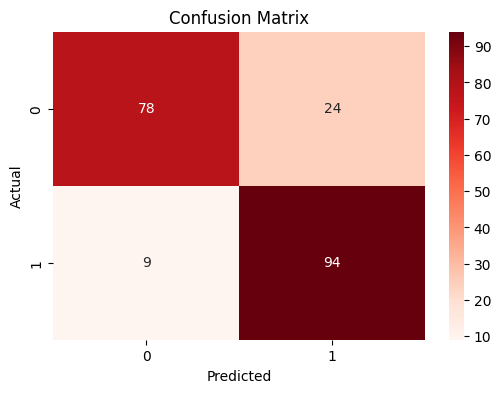

In [73]:
# =================================
# 4. PLOT CONFUSION MATRIX
# =================================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


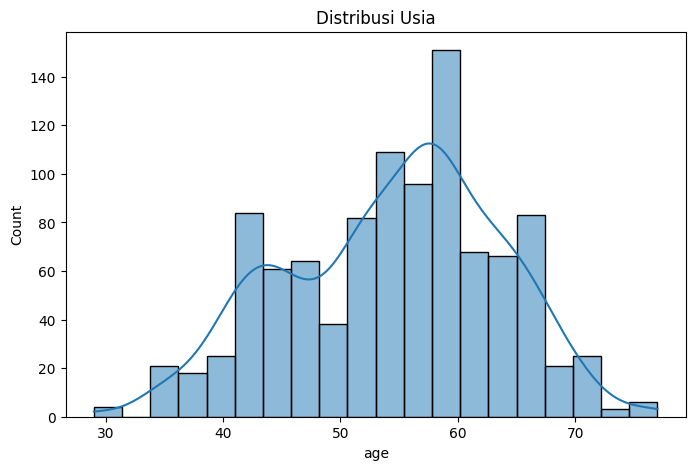

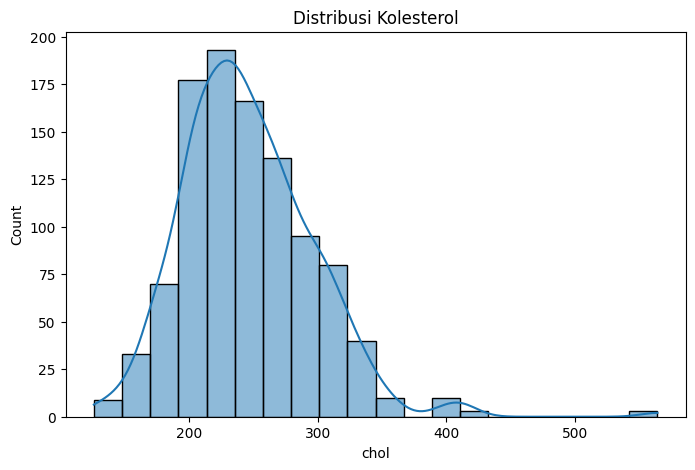

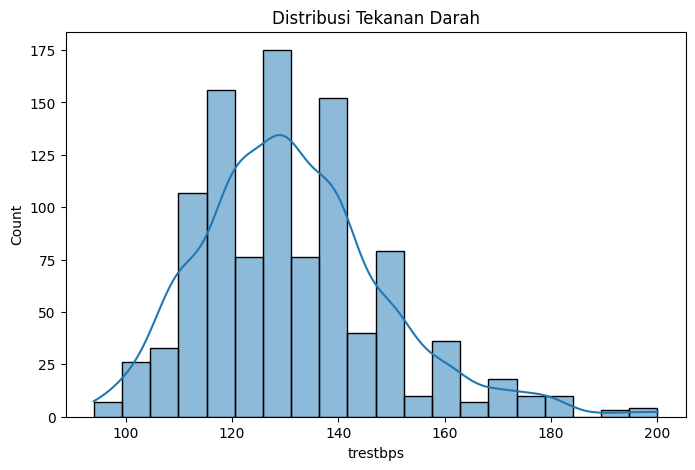

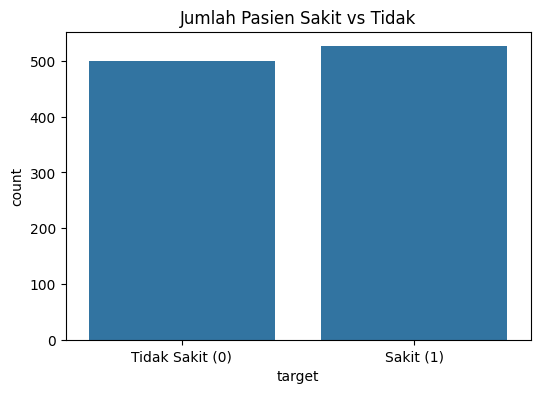

In [74]:
# ============================
# 5. Visualisasi Dataset
# ============================

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Distribusi Usia")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['chol'], bins=20, kde=True)
plt.title("Distribusi Kolesterol")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['trestbps'], bins=20, kde=True)
plt.title("Distribusi Tekanan Darah")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=df['target'])
plt.xticks([0,1], ["Tidak Sakit (0)", "Sakit (1)"])
plt.title("Jumlah Pasien Sakit vs Tidak")
plt.show()

C:\Users\vikau\AppData\Local\Temp\ipykernel_19148\3429434710.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")


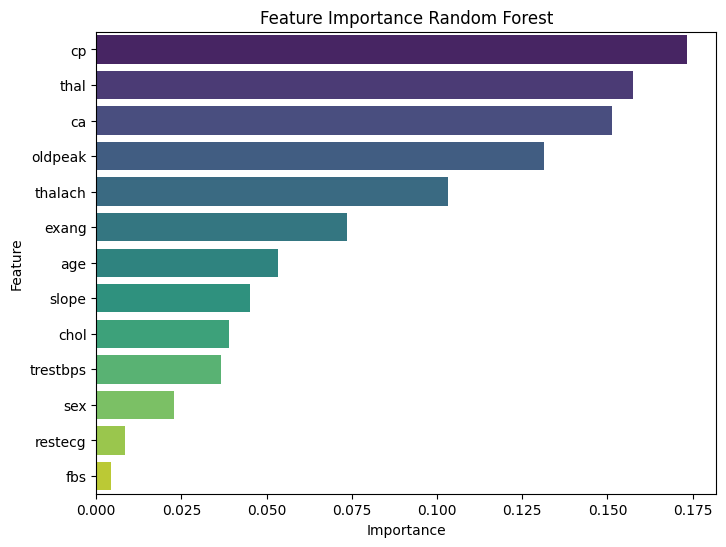

,Feature,Importance
2,cp,0.173278
12,thal,0.157482
11,ca,0.151384
9,oldpeak,0.131516
7,thalach,0.103087
8,exang,0.073628
0,age,0.053254
10,slope,0.045078
4,chol,0.038928
3,trestbps,0.036643


In [75]:
# ============================
# 6. Feature Importance
# ============================

importance = rf.feature_importances_
feat_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")
plt.title("Feature Importance Random Forest")
plt.show()

feat_df


In [ ]:
# =================================
# 7. SAVE MODEL (opsional)
# =================================
with open("model_heart_RF.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("scaler_heart.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("\nModel saved successfully!")


Model saved successfully!
